In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 140590 files belonging to 38 classes.


In [4]:
## Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [6]:
## Building the model

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25)) ## To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [18]:
#Compiling and Training

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=200)

Epoch 1/200
4394/4394 [==============================] - 491s 107ms/step - loss: 0.8806 - accuracy: 0.7366 - val_loss: 0.3884 - val_accuracy: 0.8759
Epoch 2/200
4394/4394 [==============================] - 468s 106ms/step - loss: 0.2193 - accuracy: 0.9287 - val_loss: 0.1790 - val_accuracy: 0.9425
Epoch 3/200
4394/4394 [==============================] - 468s 107ms/step - loss: 0.1192 - accuracy: 0.9608 - val_loss: 0.1955 - val_accuracy: 0.9425
Epoch 4/200
4394/4394 [==============================] - 469s 107ms/step - loss: 0.0781 - accuracy: 0.9742 - val_loss: 0.1423 - val_accuracy: 0.9596
Epoch 5/200
4394/4394 [==============================] - 469s 107ms/step - loss: 0.0602 - accuracy: 0.9805 - val_loss: 0.0854 - val_accuracy: 0.9740
Epoch 6/200
4394/4394 [==============================] - 468s 106ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.1371 - val_accuracy: 0.9599
Epoch 7/200
4394/4394 [==============================] - 469s 107ms/step - loss: 0.0390 - accuracy: 0.9876

In [22]:
#Evaluating Model

In [23]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

4394/4394 [==============================] - 170s 39ms/step - loss: 0.0024 - accuracy: 0.9995
Training accuracy: 0.9995447993278503


In [24]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1099/1099 [==============================] - 43s 39ms/step - loss: 0.3190 - accuracy: 0.9830
Validation accuracy: 0.9829843044281006


In [25]:
##Saving Model

In [26]:
cnn.save('trained_plant_disease_model.keras')

In [27]:
training_history.history #Return Dictionary of history

{'loss': [0.8806207180023193,
  0.21929006278514862,
  0.11923757940530777,
  0.07811011373996735,
  0.06017155200242996,
  0.04803622141480446,
  0.03902636095881462,
  0.034184083342552185,
  0.030278952792286873,
  0.027954861521720886,
  0.02350330911576748,
  0.023304594680666924,
  0.02145218662917614,
  0.01789006218314171,
  0.019444020465016365,
  0.01854710839688778,
  0.017932385206222534,
  0.01667219027876854,
  0.015867404639720917,
  0.016165437176823616,
  0.01479407586157322,
  0.014808058738708496,
  0.012740494683384895,
  0.013515657745301723,
  0.013920716941356659,
  0.01195945031940937,
  0.013826953247189522,
  0.011571825481951237,
  0.01350032165646553,
  0.012872885912656784,
  0.012110821902751923,
  0.011925219558179379,
  0.011548279784619808,
  0.011693337932229042,
  0.011694301851093769,
  0.01056674961000681,
  0.01109862420707941,
  0.011950982734560966,
  0.009858503937721252,
  0.011173817329108715,
  0.013000430539250374,
  0.01092594489455223,
  0

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [29]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
## Accuracy Visualiaztion

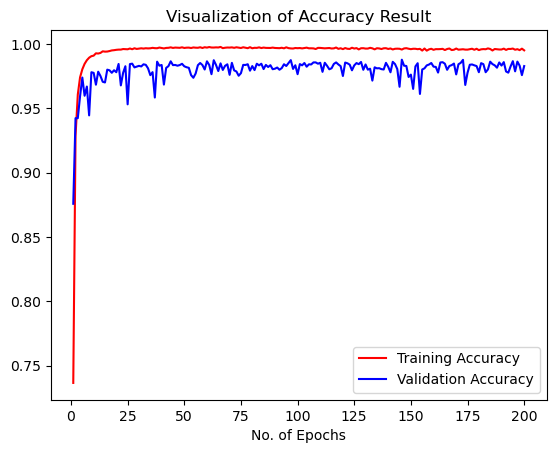

In [46]:
epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [35]:
##Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [38]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

35144/35144 [==============================] - 171s 5ms/step


(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (35144, 38))

In [39]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [40]:
predicted_categories

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(35144, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_true,predicted_categories)

In [44]:
# Precision Recall Fscore
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.97      0.99      1008
                                 Apple___Black_rot       0.99      0.99      0.99       994
                          Apple___Cedar_apple_rust       0.98      1.00      0.99       880
                                   Apple___healthy       0.99      0.97      0.98      1004
                               Blueberry___healthy       0.97      0.99      0.98       908
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      1.00       842
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.95      0.94       820
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       954
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.